In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

In [371]:
## Importing dataset and setting to view to max rows

pd.set_option("display.max_rows", None)
df = pd.read_csv("Intellimark/dataset.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [372]:
## Shape of the dataset

df.shape

(5681, 11)

In [373]:
## Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [374]:
## Identifying null value in each column

df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [375]:
## Categorical columns - Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type
df_cat = df.loc[:,["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", 
                   "Outlet_Location_Type", "Outlet_Type"]]
df_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,Dairy,OUT017,NaN,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,NaN,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3


In [376]:
## number of unique value in Item_Identifier
df_cat["Item_Identifier"].nunique()

1543

In [377]:
## number of unique value in Item_Fat_Content
print(df_cat["Item_Fat_Content"].nunique())

## Value_counts
print(df_cat["Item_Fat_Content"].value_counts())

5
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


In [378]:
## Creating new copy of original dataset

df_original = df.copy()
df_original.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [379]:
## Changing low fat, lf to Low Fat and reg to Regular

x = {"reg": "Regular",
     "regular": "Regular",
     "lf": "Low Fat",
    "low fat": "Low Fat"}

df["Item_Fat_Content"] = df["Item_Fat_Content"].str.strip()
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.lower().replace(x)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [380]:
##Standardizing the value of Item_Fat_Content
df["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [381]:
## Unique Item_Type and their counts
print(df_cat["Item_Type"].value_counts())
print(df_cat["Item_Type"].nunique())

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64
16


In [382]:
## Unique Outlet_Identifier and their counts
print(df_cat["Outlet_Identifier"].value_counts())
print(df_cat["Outlet_Identifier"].nunique())

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64
10


In [383]:
## Unique Outlet_Size and their counts
print(df_cat["Outlet_Size"].value_counts())

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [384]:
## Unique Outlet_Location_Type and their counts
df_cat["Outlet_Location_Type"].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [385]:
## Unique Outlet_Type and their counts
df_cat["Outlet_Type"].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [386]:
## Coulmn with numerical value
## Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year

df_num = df[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year"]]
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,NaN,0.118599,234.2300,1985


In [387]:
## Basic information of Numerical columns

df_num.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [388]:
%%capture
pip install sickit-learn

In [389]:
from sklearn.impute import SimpleImputer

In [390]:
## Treating missing value for the column Item_Weight with mean value

si = SimpleImputer(strategy = "mean")
df["Item_Weight"] = si.fit_transform(df[["Item_Weight"]])

In [391]:
## Checking the null value counts
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [392]:
## Treating missing value for Outlet_Size with mode value

df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [393]:
## ## Checking the null value counts
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [394]:
## Copying the cleaned data

df_clean = df.copy()

### Univariate Analysis

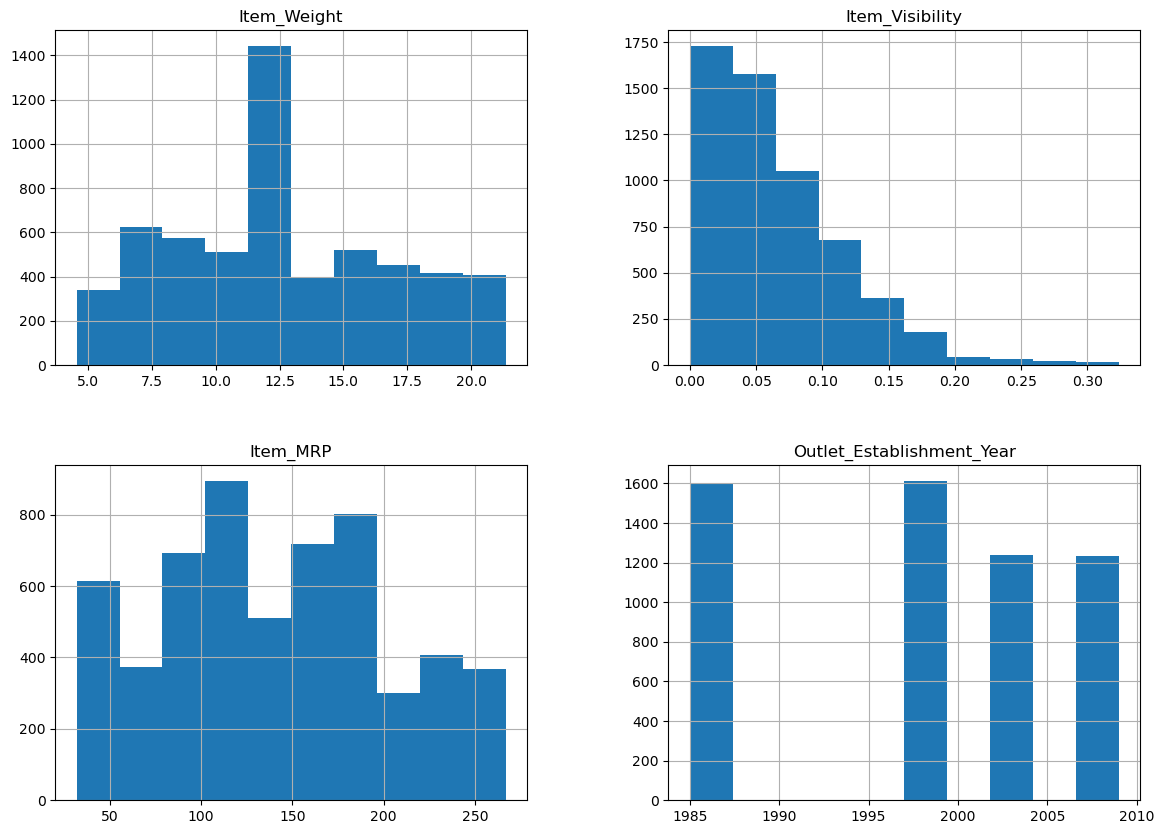

In [395]:
# Distribution of numerical columns
df.hist(figsize=(14, 10))
plt.show()

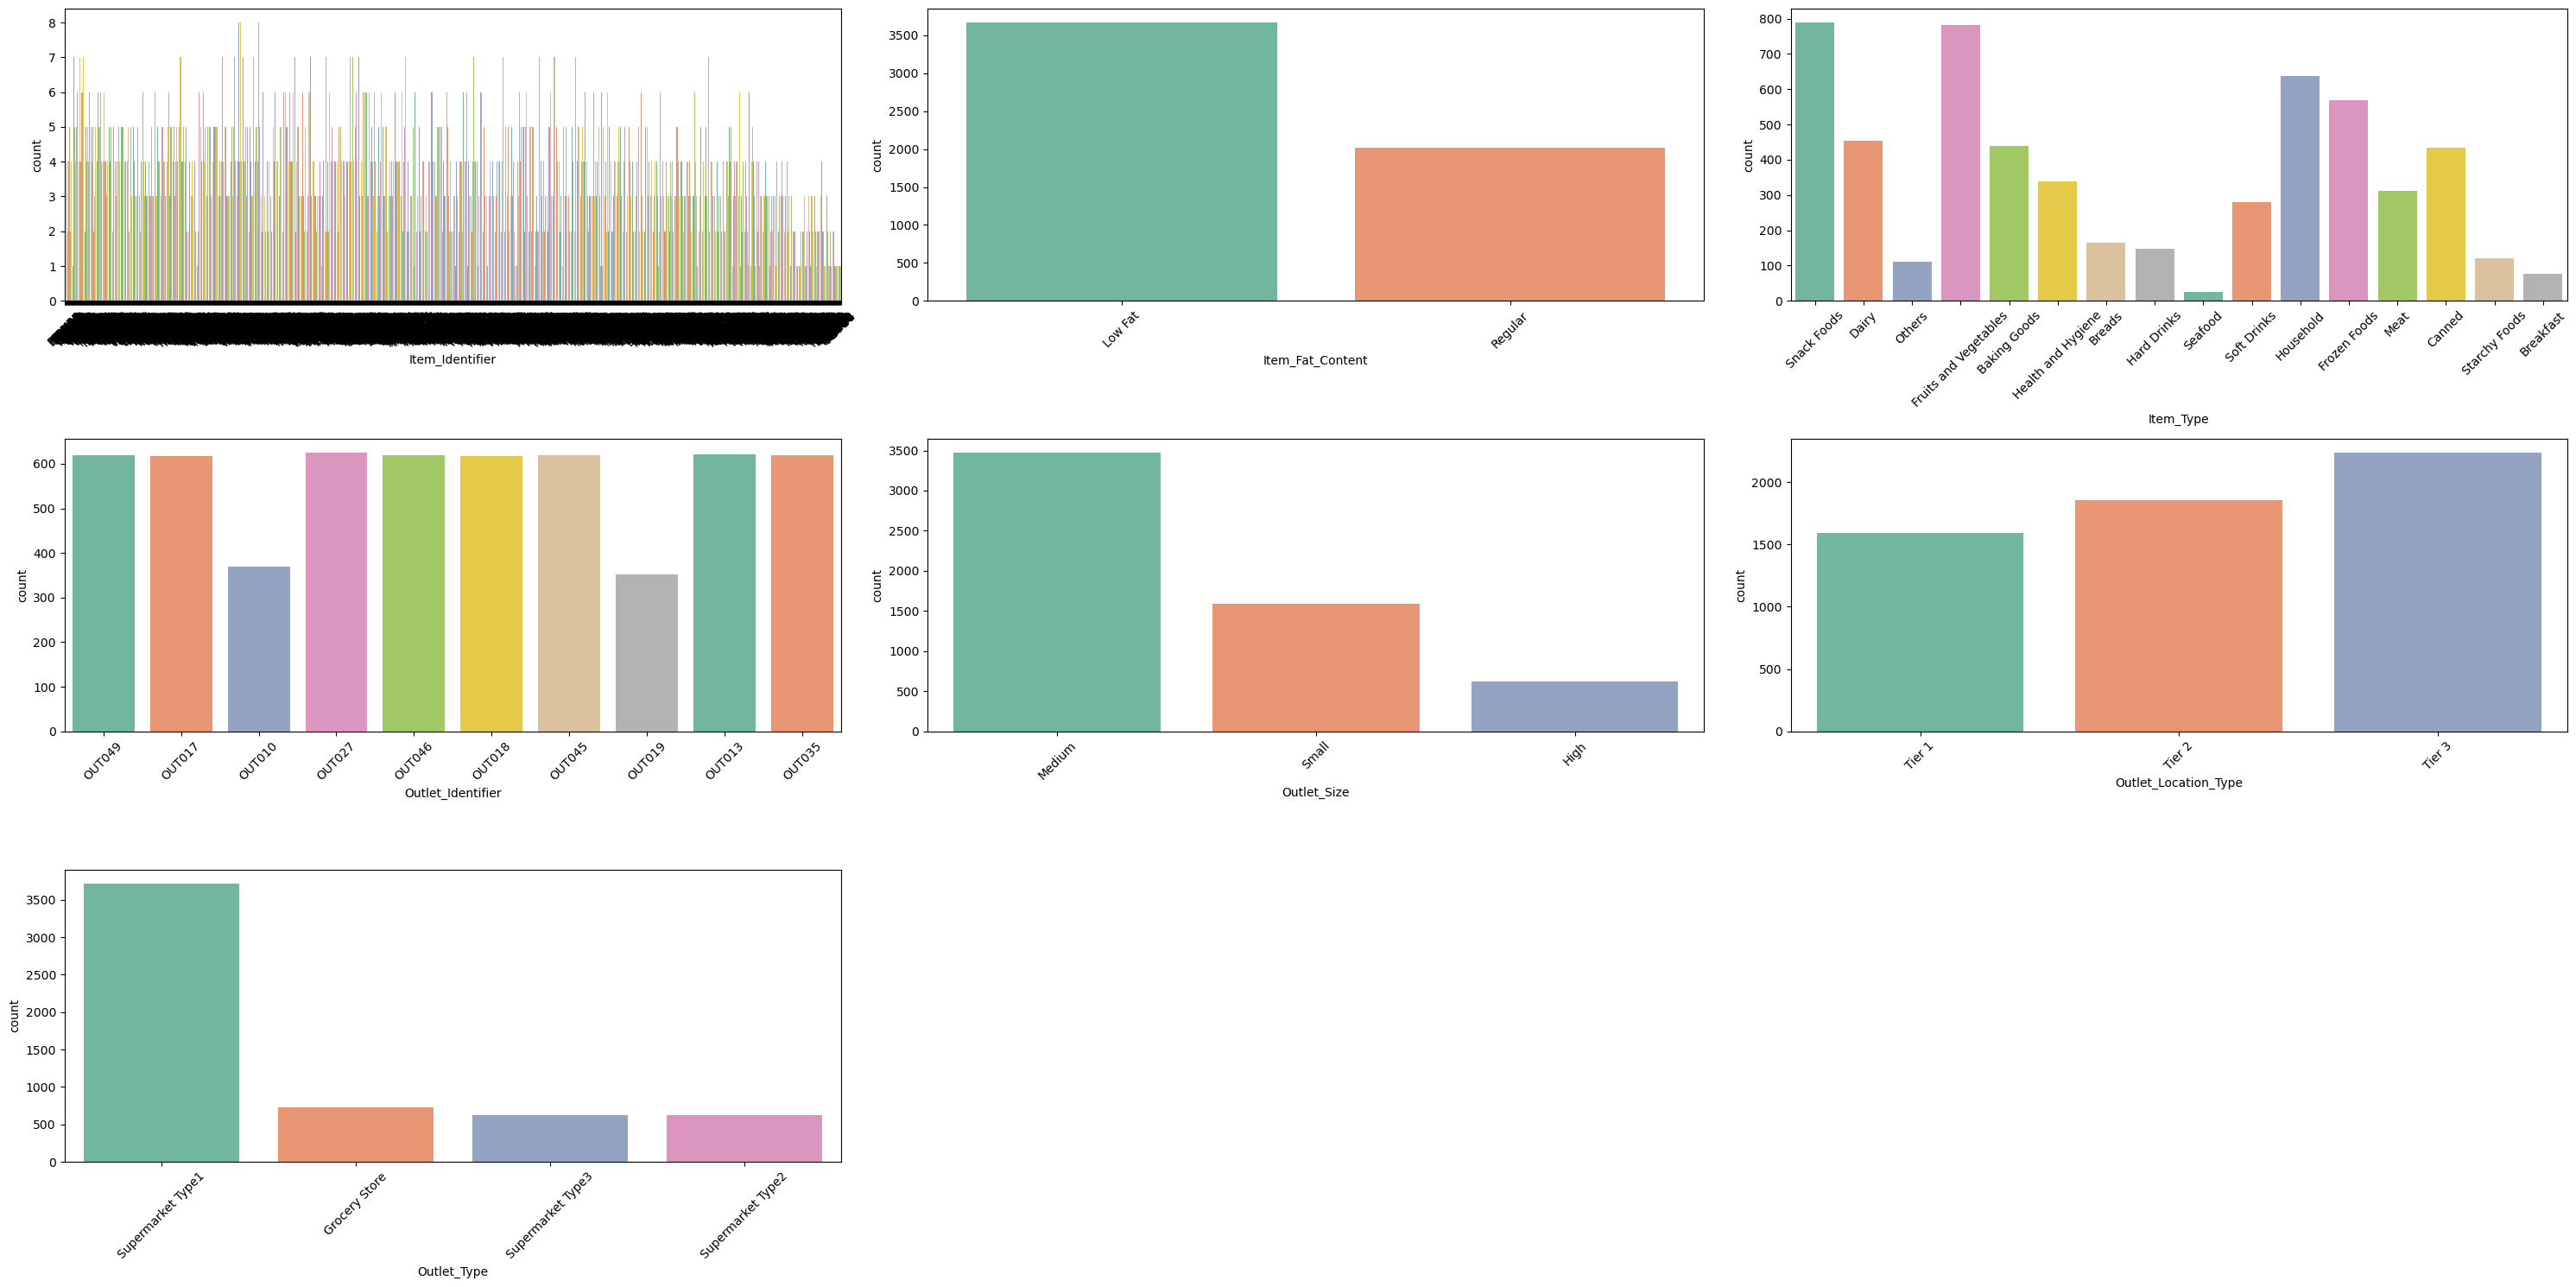

In [396]:
# Distribution of categorical columns
plt.figure(figsize=(30, 15))
for i, col in enumerate(df.select_dtypes(include=['object']).columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bivariate Analysis

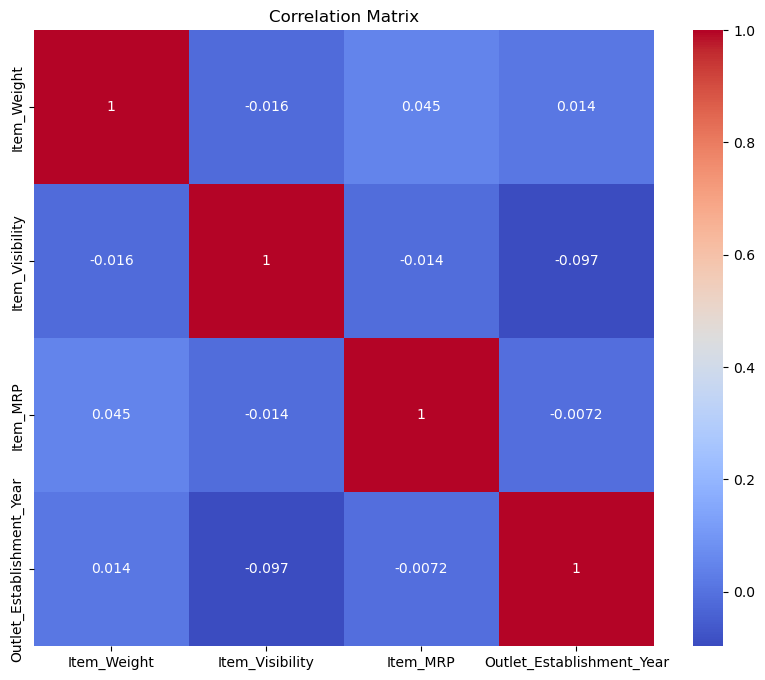

In [397]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

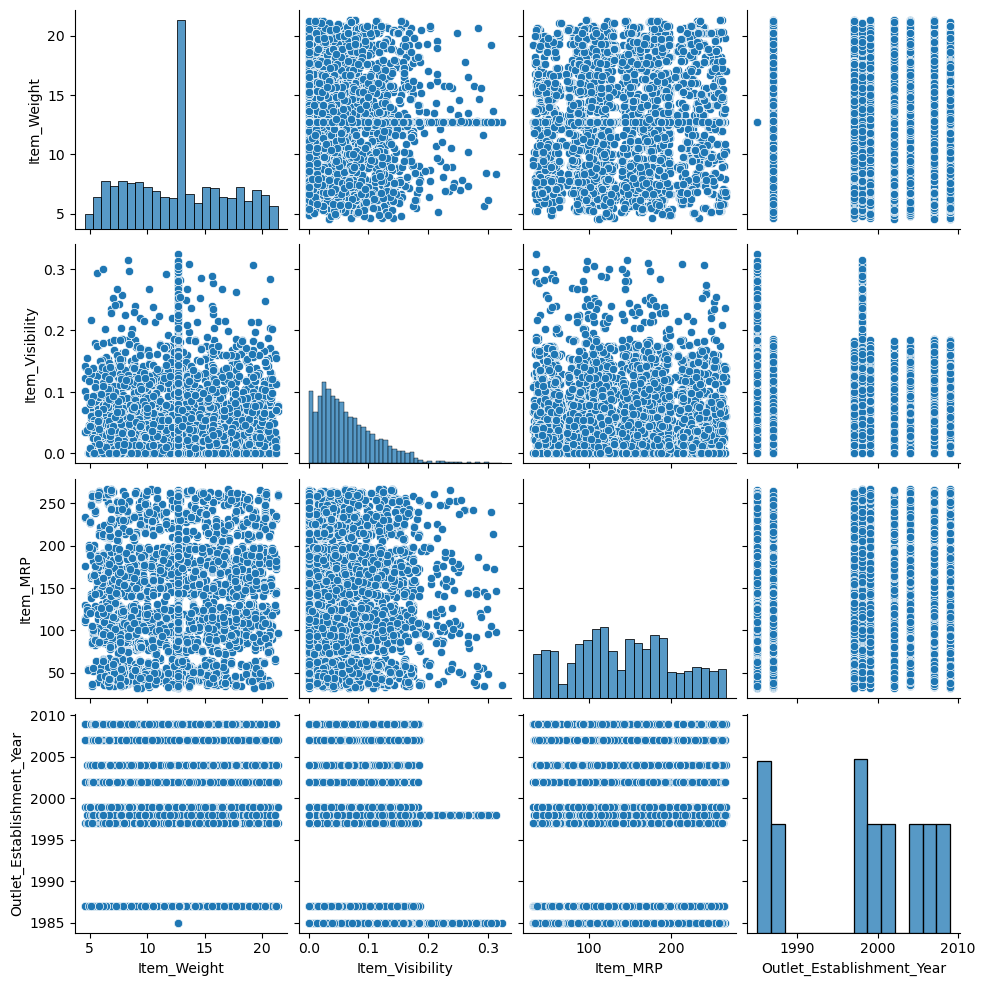

In [398]:
# Pairplot for numerical columns
sns.pairplot(df)
plt.show()

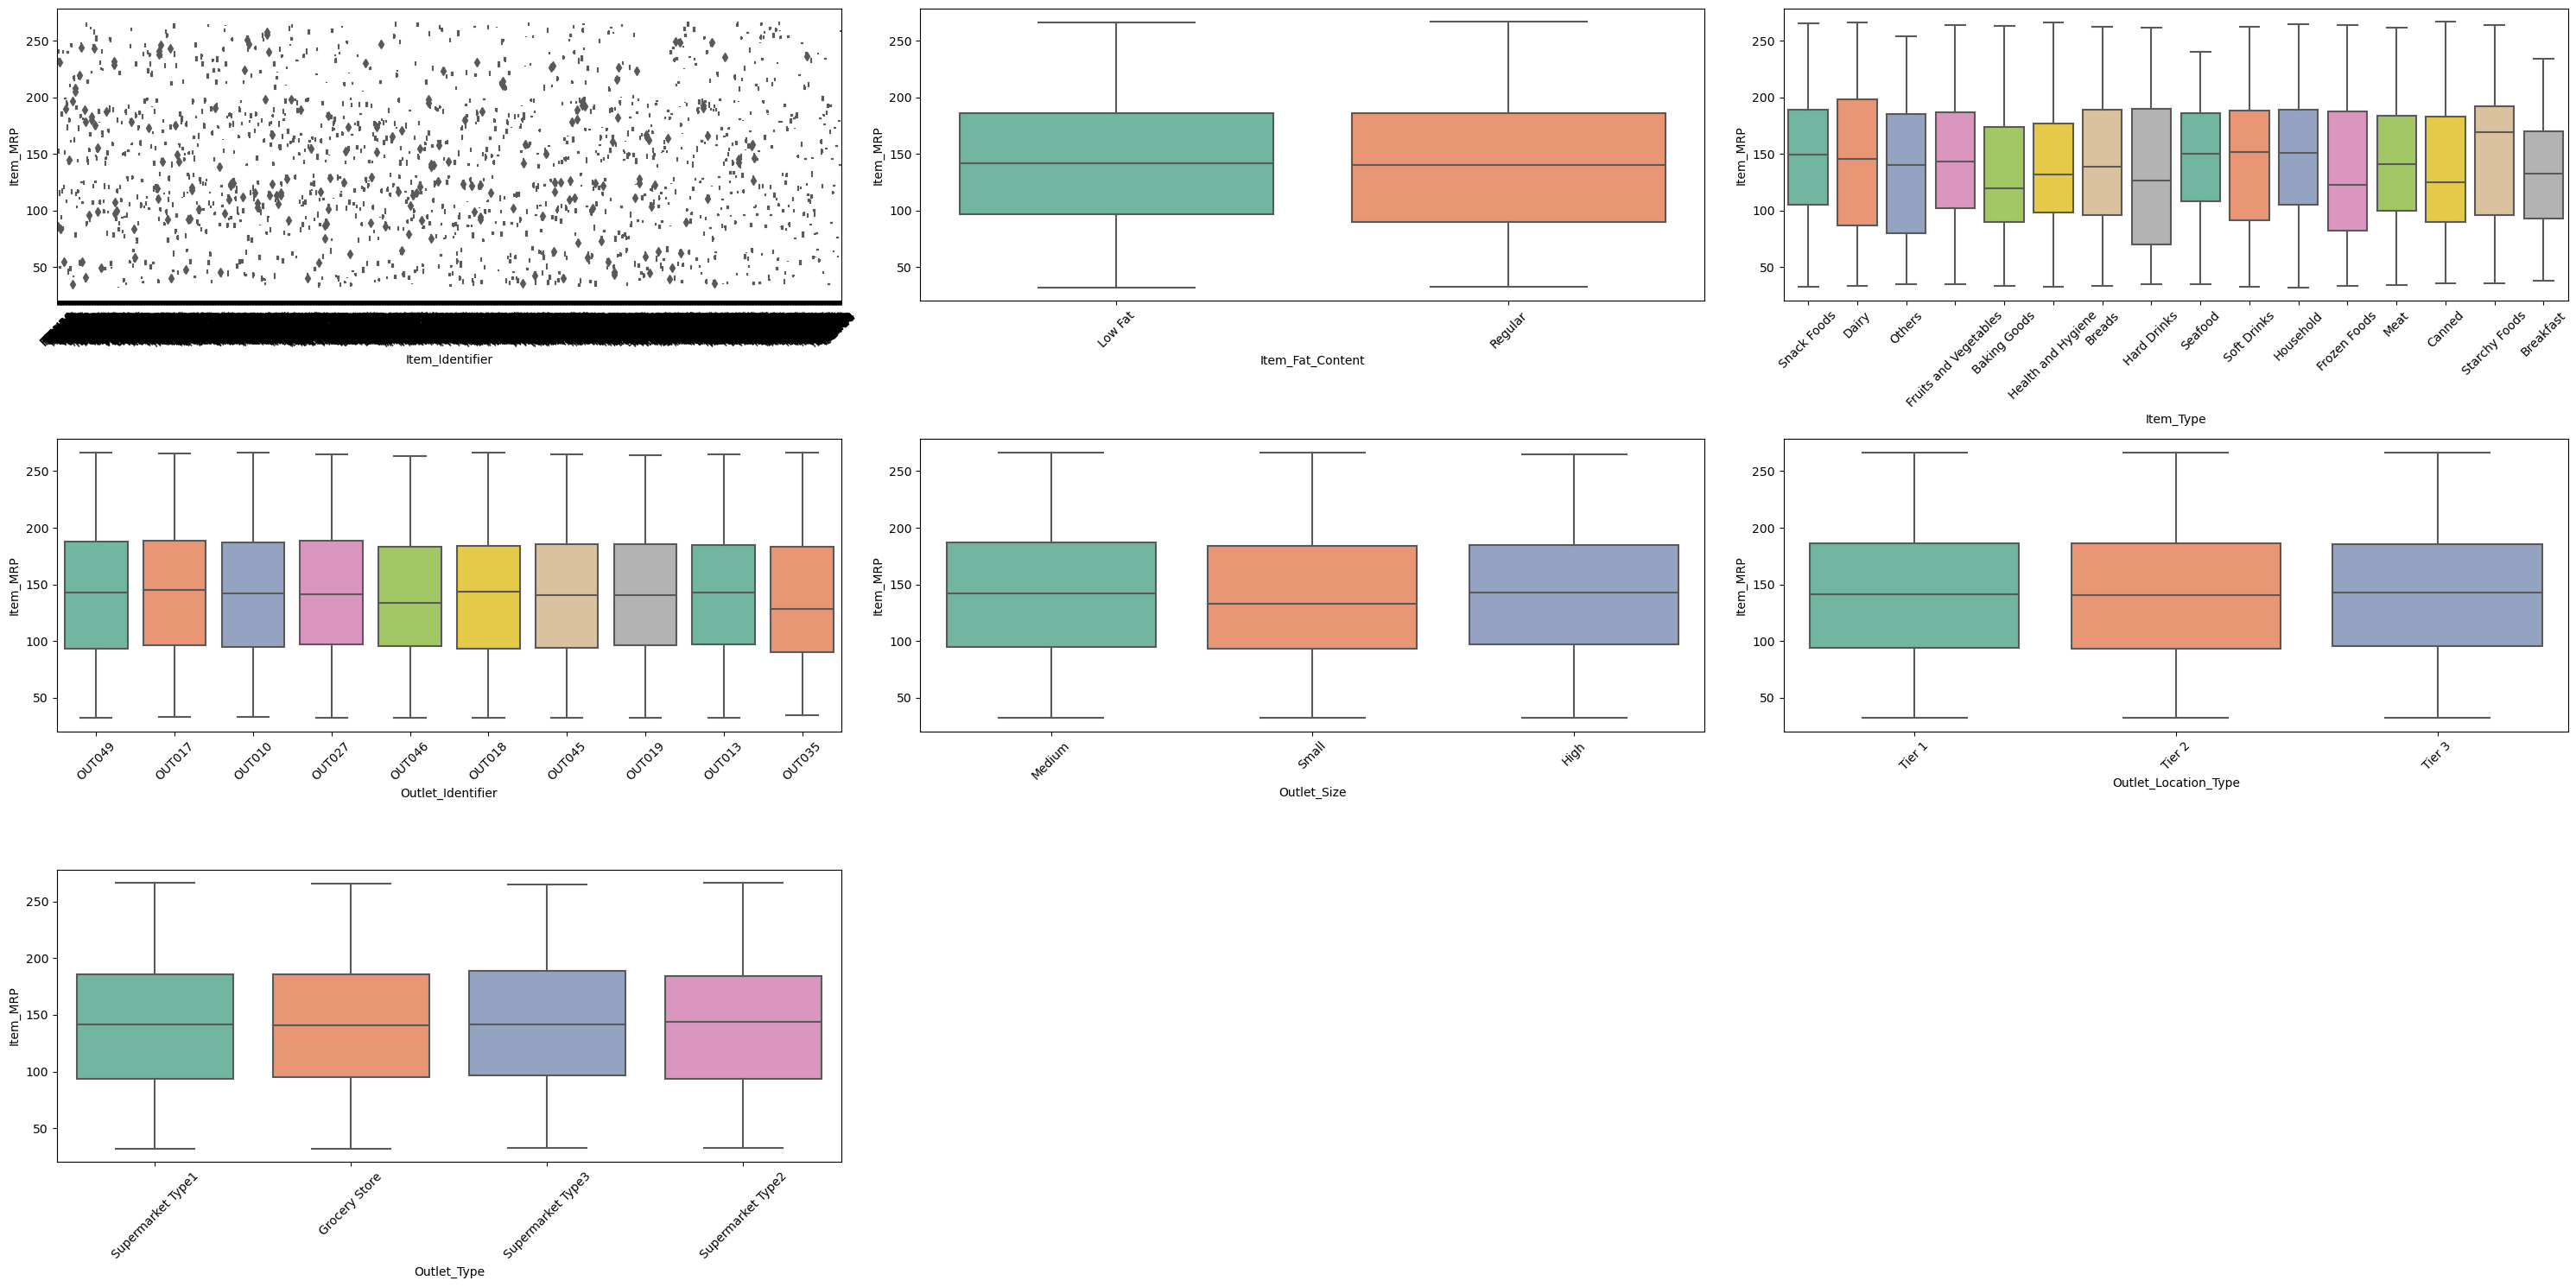

In [399]:
# Boxplot for numerical columns against categorical columns
plt.figure(figsize=(30, 15))
for i, col in enumerate(df.select_dtypes(include=['object']).columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=col, y='Item_MRP', palette='Set2')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Multivariate Analysis

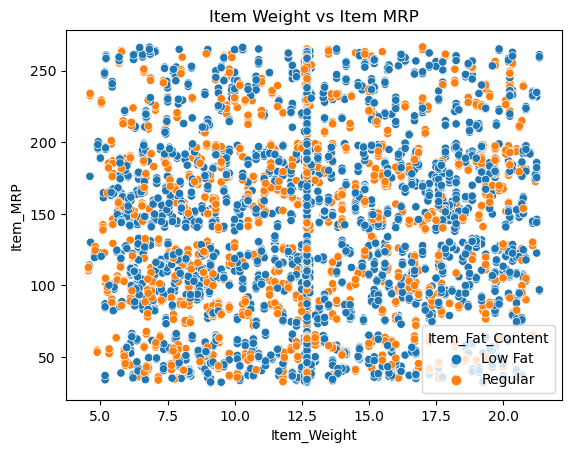

In [400]:
# Scatter plot with hue for categorical columns
sns.scatterplot(data=df, x='Item_Weight', y='Item_MRP', hue='Item_Fat_Content')
plt.title('Item Weight vs Item MRP')
plt.show()

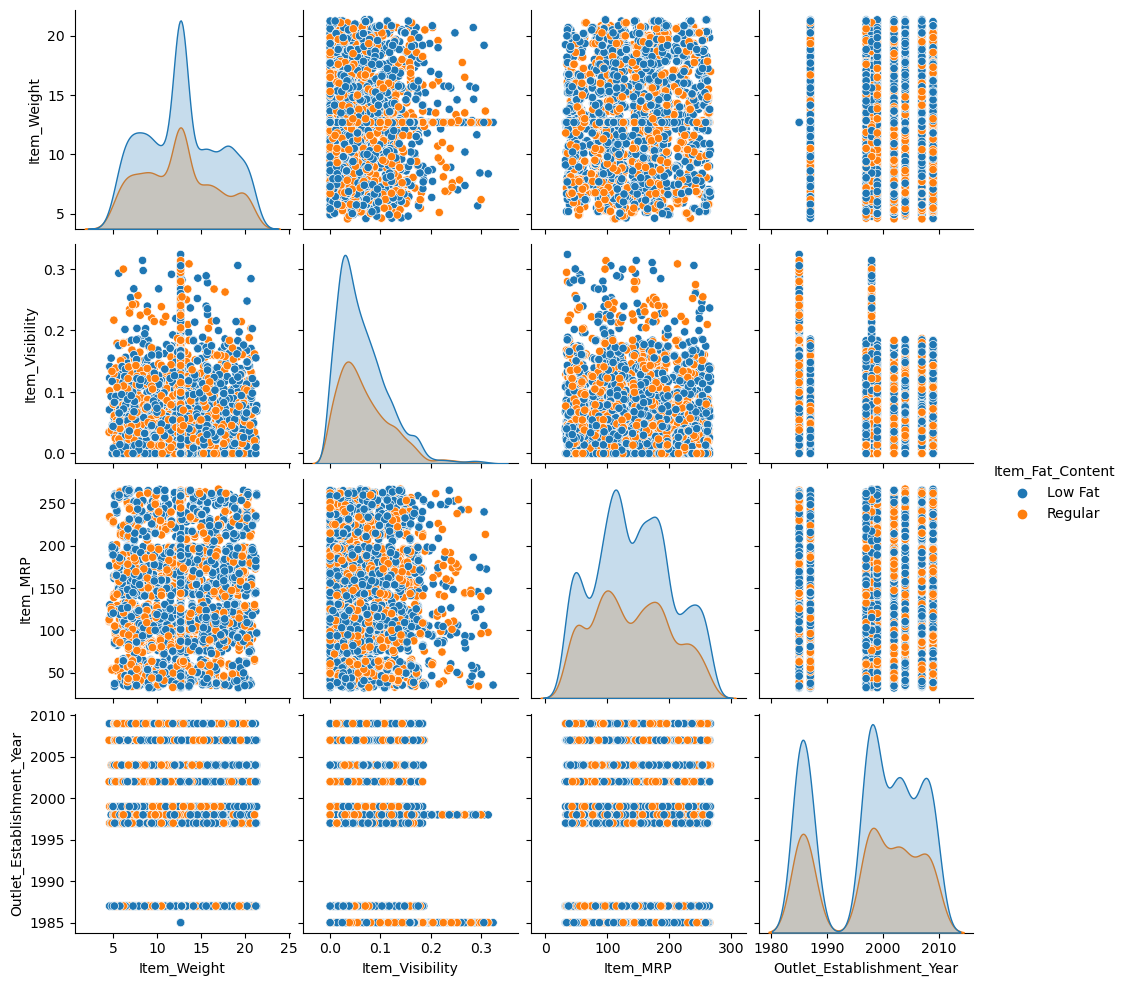

In [401]:
# Pairplot with hue for categorical columns
sns.pairplot(df, hue='Item_Fat_Content')
plt.show()

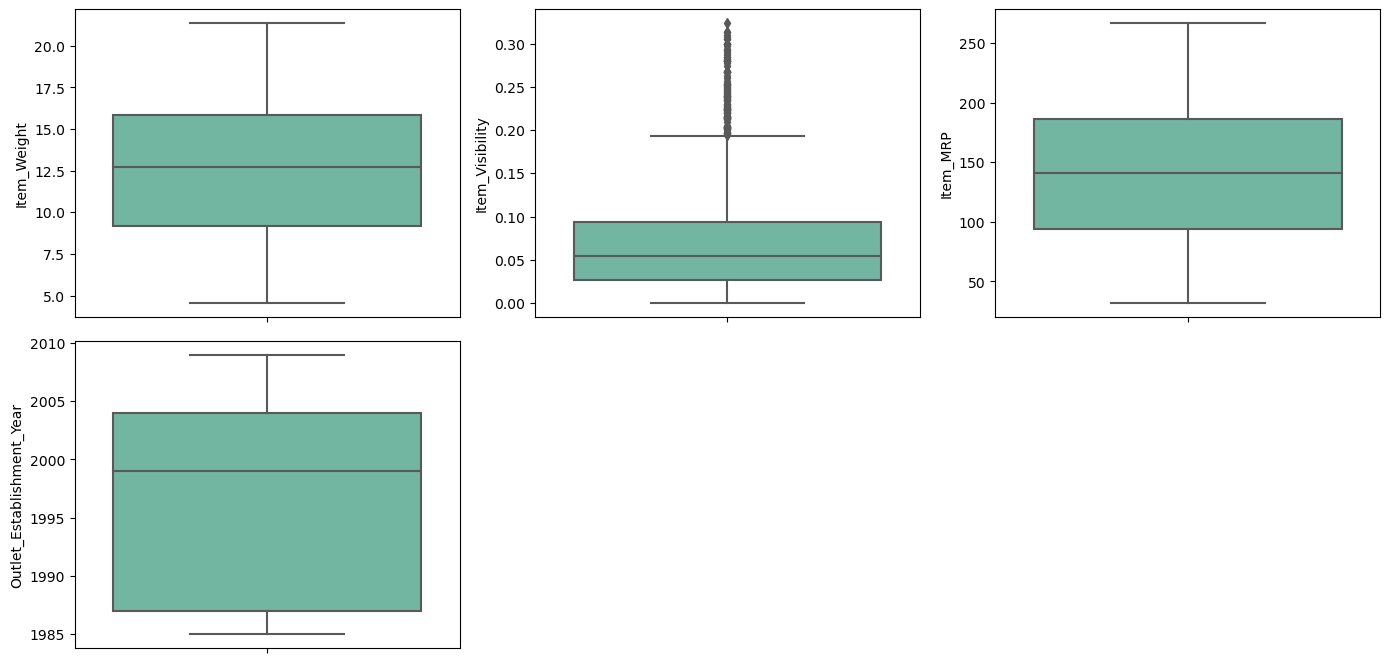

In [402]:
# Boxplot for numerical columns to detect outliers
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, y=col, palette='Set2')
plt.tight_layout()
plt.show()

In [403]:
## Capping the Item_Visibility to remove outliers
cap = df["Item_Visibility"].quantile(0.95)
df["Item_Visibility"] = df["Item_Visibility"].clip(upper = cap)

<AxesSubplot:>

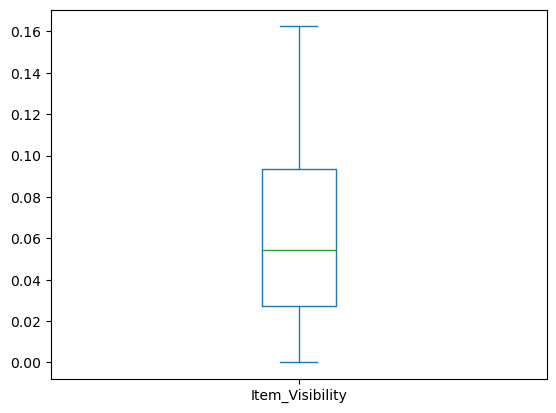

In [404]:
df["Item_Visibility"].plot(kind = "box")

### Basic Information about the Dataset

Dataset Overview: The dataset contains 5681 entries and 11 columns, including both numerical and categorical data.

Missing Values: Missing values were found in two columns: Item_Weight (976 missing) and Outlet_Size (1606 missing).

Data Imputation:

Item_Weight was filled using the mean value strategy with the SimpleImputer class.
Outlet_Size was filled using the mode.
Categorical Data Analysis: The categorical columns include Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, and Outlet_Type.

Inconsistencies Fixed: Item_Fat_Content had inconsistent labels (e.g., 'Low Fat', 'low fat', 'LF') which were standardized to 'Low Fat' and 'Regular'.

Numerical Data Analysis: The numerical columns are Item_Weight, Item_Visibility, Item_MRP, and Outlet_Establishment_Year. Descriptive statistics showed:

Average Item_Weight: 12.7
Average Item_MRP: 141.02
Average Item_Visibility: 0.066
Univariate Analysis: Histograms and count plots were used to explore distributions of numerical and categorical columns.

Bivariate Analysis: Box plots and scatter plots were created to examine relationships between numerical and categorical variables.

Correlation Analysis: A correlation heatmap revealed relationships among numerical columns, with no strong correlations observed.

Multivariate Analysis: Pair plots and scatter plots with hue were used to explore interactions between multiple variables, providing insights into patterns and trends.

### Visualization Analysis

Univariate Analysis: Histograms showed that Item_Visibility is right-skewed, indicating most products have low visibility, while Item_MRP is uniformly distributed across its range.

Categorical Distribution: Count plots revealed that 'Low Fat' is the dominant category in Item_Fat_Content, and Outlet_Type is mostly composed of 'Supermarket Type1'.

Box Plots: Box plots of Item_MRP against categorical variables showed price variations across Item_Type and Outlet_Type, suggesting product type and store type influence pricing.

Correlation Heatmap: The correlation matrix indicated weak correlations among numerical variables, highlighting that no single feature strongly predicts another.

Pair Plots and Scatter Plots: Pair plots showed no clear linear relationships, while scatter plots illustrated that Item_Weight and Item_MRP are spread uniformly without noticeable clusters, indicating no obvious interaction.

## Model Building and Training

In [405]:
df_model = df.copy()

In [406]:
df_model.head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,12.695633,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305000,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,Medium,Tier 2,Supermarket Type1
9,FDA36,5.985000,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [407]:
## Encoding Ordinal categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Outlet_Size"] = le.fit_transform(df["Outlet_Size"])

In [408]:
# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['Item_Type', 'Outlet_Type'], drop_first=True)

In [409]:
## Creating new features

# Create Outlet Age
df['Outlet_Age'] = 2023 - df['Outlet_Establishment_Year']

# Create Item Category
df['Item_Category'] = df['Item_Identifier'].apply(lambda x: x[:2])

In [410]:
#Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Age"]
df[num_features] = scaler.fit_transform(df[num_features])

In [412]:
## Label Encoding 

le = LabelEncoder()

# Apply Label Encoding to categorical features with inherent order
df["Outlet_Location_Type"] = le.fit_transform(df["Outlet_Location_Type"])
df["Item_Fat_Content"] = le.fit_transform(df["Item_Fat_Content"])

In [413]:
## OneHotEncoding for nominal data

df = pd.get_dummies(df, columns=['Item_Category'], drop_first=True)

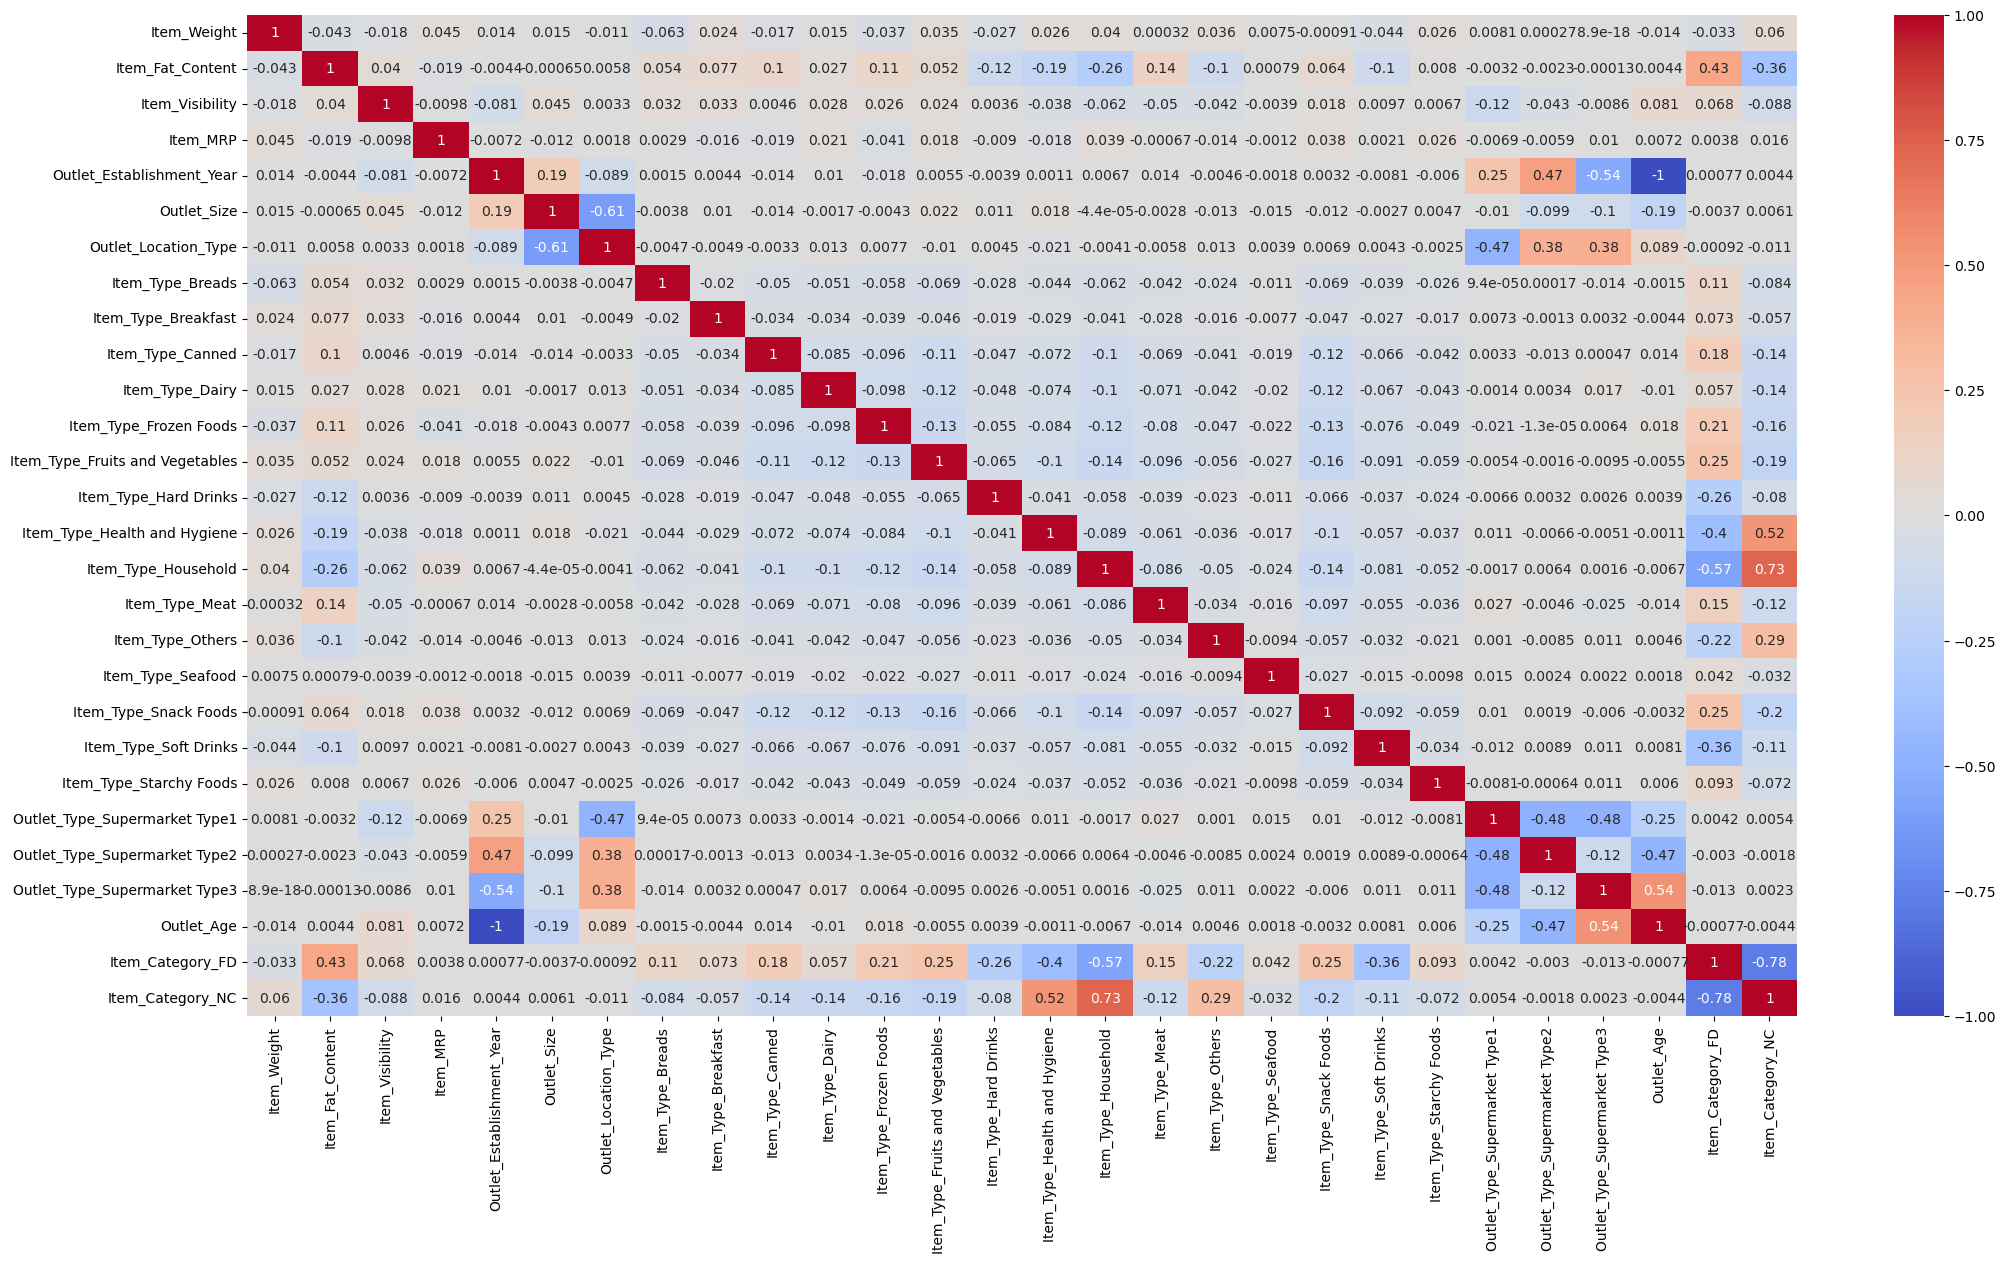

In [414]:
## Co-relation Analysis
plt.figure(figsize = (25,13))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.show()

In [415]:
## Keeping the copy if need to be used 
df_model_2 = df.copy()

In [417]:
df_model_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Age,Item_Category_FD,Item_Category_NC
0,FDW58,1.897460e+00,0,-1.230034,-0.536555,OUT049,1999,1,0,0,...,0,1,0,0,1,0,0,-0.139891,1,0
1,FDW14,-1.035530e+00,1,-0.554111,-0.868937,OUT017,2007,1,1,0,...,0,0,0,0,1,0,0,-1.095512,1,0
2,NCN55,4.486336e-01,0,0.785067,1.629848,OUT010,1998,1,2,0,...,0,0,0,0,0,0,0,-0.020438,0,1
3,FDQ58,-1.267578e+00,0,-1.058692,0.226697,OUT017,2007,1,1,0,...,0,1,0,0,1,0,0,-1.095512,1,0
4,FDY38,4.184768e-16,1,1.201718,1.508110,OUT027,1985,1,2,0,...,0,0,0,0,0,0,1,1.532446,1,0


In [416]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

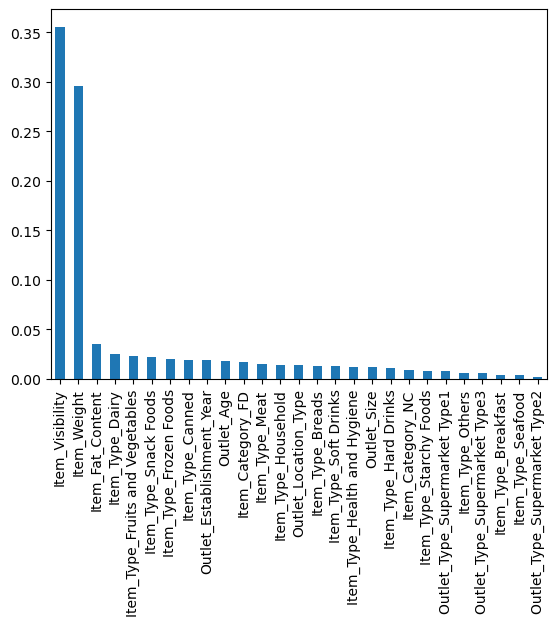

In [418]:
##Feature Importance using RandomForest
X = df.drop(columns=['Item_MRP', 'Item_Identifier', 'Outlet_Identifier']) ## Independent Variables
y = df['Item_MRP'] ## Dependent Variables

rf = RandomForestRegressor()
rf.fit(X, y)

# Plot feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [423]:
## Split the Data into traning and testing sets (80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [424]:
## Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Linear Regression R2:", r2_score(y_test, y_pred))

Linear Regression RMSE: 0.972153996327502
Linear Regression R2: 0.004114200587319927


In [425]:
## Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Random Forest R2:", r2_score(y_test, y_pred))

Random Forest RMSE: 0.7068093451853564
Random Forest R2: 0.47356594742704616


In [426]:
## Gradient Bossting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Gradient Boosting R2:", r2_score(y_test, y_pred))

Gradient Boosting RMSE: 0.9170562798451238
Gradient Boosting R2: 0.11380073304025828


In [427]:
## Hyperparameter Tunning

from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [429]:
## Final Model Evaluation
y_pred = best_model.predict(X_test)
print("Best Model RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Best Model R2:", r2_score(y_test, y_pred))

Best Model RMSE: 0.7062624321506491
Best Model R2: 0.4743803176860226


## Random Forest Regressor is the best model for the price prediction